# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

654

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=e3ccf44e02cf0a5895ed131fd26f64b2&units=imperial&q='

In [5]:
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 63.7506, 'lon': -68.5145},
 'dt': 1644359389,
 'id': 5983720,
 'main': {'feels_like': -12.91,
          'humidity': 84,
          'pressure': 1002,
          'temp': -0.31,
          'temp_max': -0.31,
          'temp_min': -0.67},
 'name': 'Iqaluit',
 'sys': {'country': 'CA',
         'id': 47658,
         'sunrise': 1644324615,
         'sunset': 1644353179,
         'type': 2},
 'timezone': -18000,
 'visibility': 1609,
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 160, 'speed': 13.8}}


In [4]:
# set up lists to hold reponse info
thiscity = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
for idx, city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        thiscity.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])                  
        print(f"Weather check for city {idx}: {city}")
    
    except:
        print(f"Missing result... city {idx}: {city} NOT FOUND")

Weather check for city 0: mogadishu
Weather check for city 1: georgetown
Weather check for city 2: mahina
Missing result... city 3: phan rang NOT FOUND
Weather check for city 4: miyako
Weather check for city 5: kodiak
Weather check for city 6: bambous virieux
Weather check for city 7: avarua
Weather check for city 8: rocha
Weather check for city 9: airai
Weather check for city 10: anadyr
Weather check for city 11: norman wells
Weather check for city 12: yellowknife
Weather check for city 13: rikitea
Weather check for city 14: sisimiut
Weather check for city 15: saint-philippe
Weather check for city 16: clyde river
Weather check for city 17: ostrovnoy
Weather check for city 18: bredasdorp
Missing result... city 19: abu jubayhah NOT FOUND
Weather check for city 20: tazovskiy
Weather check for city 21: fria
Weather check for city 22: ushuaia
Weather check for city 23: qaanaaq
Weather check for city 24: punta arenas
Weather check for city 25: upernavik
Weather check for city 26: hobart
Wea

Weather check for city 218: oriximina
Weather check for city 219: vanimo
Missing result... city 220: palabuhanratu NOT FOUND
Weather check for city 221: boa vista
Weather check for city 222: ranong
Weather check for city 223: bathsheba
Weather check for city 224: lagoa
Weather check for city 225: college
Weather check for city 226: yeppoon
Weather check for city 227: cherskiy
Weather check for city 228: spinus
Weather check for city 229: berlevag
Missing result... city 230: hendijan NOT FOUND
Weather check for city 231: belmonte
Weather check for city 232: orlik
Weather check for city 233: mattru
Weather check for city 234: tasiilaq
Weather check for city 235: nivala
Weather check for city 236: benemerito de las americas
Weather check for city 237: kununurra
Weather check for city 238: pochutla
Weather check for city 239: forio
Weather check for city 240: bundaberg
Weather check for city 241: belyy yar
Weather check for city 242: rafsanjan
Weather check for city 243: salalah
Weather ch

Weather check for city 434: yaan
Weather check for city 435: parana
Weather check for city 436: vanjulet
Weather check for city 437: placido de castro
Weather check for city 438: zhigalovo
Weather check for city 439: hovd
Weather check for city 440: la palma
Weather check for city 441: khor
Weather check for city 442: pisco
Weather check for city 443: semenivka
Weather check for city 444: nedjo
Weather check for city 445: marzuq
Weather check for city 446: marawi
Weather check for city 447: miranda
Weather check for city 448: tabou
Weather check for city 449: sakakah
Weather check for city 450: san quintin
Weather check for city 451: strezhevoy
Weather check for city 452: chokwe
Weather check for city 453: kiama
Weather check for city 454: port keats
Weather check for city 455: aizawl
Missing result... city 456: aflu NOT FOUND
Weather check for city 457: salto
Weather check for city 458: takab
Weather check for city 459: sudbury
Weather check for city 460: olafsvik
Weather check for ci

Weather check for city 653: dolinsk


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
print(len(thiscity))
print(len(lat))
print(len(lon))
print(len(max_temp))

600
600
600
600


In [6]:
# create the data frame
weather_dict = {
    'city': thiscity,
    'lat': lat,
    'lon': lon,
    'max temp': max_temp,
    'humidity': humidity,
    'cloudiness': cloudiness,
    'wind speed': wind_speed,
    'country': country,
    'date': date
}
city_df = pd.DataFrame(weather_dict)
city_df.head(30)

,city,lat,lon,max temp,humidity,cloudiness,wind speed,country,date
0,Mogadishu,2.0371,45.3438,77.67,81,67,23.64,SO,1644430843
1,George Town,5.4112,100.3354,80.53,95,20,3.44,MY,1644430895
2,Mahina,-17.5065,-149.4890,82.17,74,20,5.75,PF,1644430940
3,Miyako,39.6367,141.9525,32.52,71,100,1.70,JP,1644430941
4,Saint Paul Harbor,57.7900,-152.4072,24.31,63,0,8.05,US,1644430941
5,Bambous Virieux,-20.3428,57.7575,77.25,83,40,4.61,MU,1644430942
6,Avarua,-21.2078,-159.7750,77.05,88,99,1.14,CK,1644430942
7,Rocha,-34.4833,-54.3333,77.92,46,7,8.52,UY,1644430942
8,Airai,-8.9266,125.4092,61.29,93,100,1.21,TL,1644430776
9,Anadyr,64.7500,177.4833,-21.50,76,0,11.18,RU,1644430943


In [7]:
# export to a CSV
city_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_df = city_df[(city_df['humidity'] > 100)]
high_humidity_df.index

Int64Index([], dtype='int64')

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#clean_city_df = city_df.join(high_humidity_df, how='outer')
#clean_city_df = pd.merge(city_df, high_humidity_df, on=index)
#clean_city_df

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [23]:
# date of analysis
find_date = city_df["date"][0]
run_date = pd.to_datetime(find_date, unit='s')
run_date

Timestamp('2022-02-09 18:20:43')

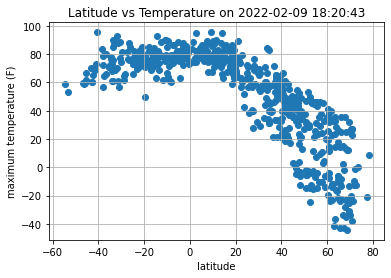

In [24]:
# lat vs temp basic plot
x_lat = city_df['lat']
y_maxtemp = city_df['max temp']
plt.scatter(x_lat, y_maxtemp)

# titles, labels, and design elements
plt.title(f'Latitude vs Temperature on {run_date}')
plt.xlabel('latitude')
plt.ylabel('maximum temperature (F)')
plt.grid()

# display plot
plt.show()

## Latitude vs. Temperature Plot commentary
In this plot we see that temperatures are highest near the equator (0deg latitude). The temperatures skew colder in the northern hemisphere (the positive degrees latitude) right now because it is our winter.

In [27]:
# export .png to file
plt.savefig("../output_data/LatVsTemp.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

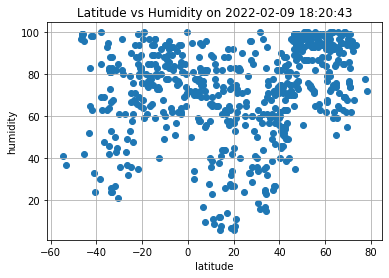

In [28]:
# lat vs temp basic plot
x_lat = city_df['lat']
y_humidity = city_df['humidity']
plt.scatter(x_lat, y_humidity)

# titles, labels, and design elements
plt.title(f'Latitude vs Humidity on {run_date}')
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.grid()

# display plot
plt.show()

## Latitude vs. Humidity Plot commentary
In this plot we see that there doesn't appear to be any particular correlation between latitude and humidity.

In [29]:
# export .png to file
plt.savefig("../output_data/LatVsHumidity.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

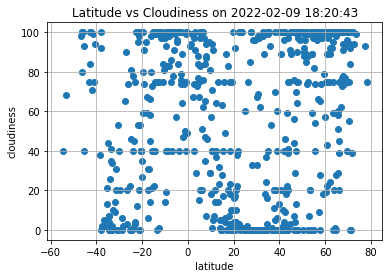

In [30]:
# lat vs temp basic plot
x_lat = city_df['lat']
y_cloudiness = city_df['cloudiness']
plt.scatter(x_lat, y_cloudiness)

# titles, labels, and design elements
plt.title(f'Latitude vs Cloudiness on {run_date}')
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.grid()

# display plot
plt.show()

## Latitude vs. Cloudiness Plot commentary
In this plot we see that there doesn't appear to be any particular correlation between latitude and cloudiness. What we can see is that cloudiness was often rounded to the nearest 10% or so. There are many groupings of points on the 0%, 40%, 75%, and 100% lines.

In [32]:
# export .png to file
plt.savefig("../output_data/LatVsCloudiness.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

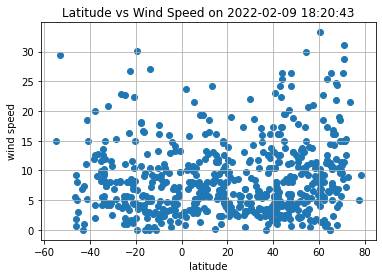

In [33]:
# lat vs temp basic plot
x_lat = city_df['lat']
y_windspeed = city_df['wind speed']
plt.scatter(x_lat, y_windspeed)

# titles, labels, and design elements
plt.title(f'Latitude vs Wind Speed on {run_date}')
plt.xlabel('latitude')
plt.ylabel('wind speed')
plt.grid()

# display plot
plt.show()

## Latitude vs. Wind Speed Plot commentary
In this plot we see that that there doesn't appear to be any particular correlation between latitude and wind speed.

In [34]:
# export .png to file
plt.savefig("../output_data/LatVsWindSpeed.png")

<Figure size 432x288 with 0 Axes>

## Linear Regression

In [35]:
northern_df = city_df.loc[city_df['lat'] > 0]
southern_df = city_df.loc[city_df['lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between latitude and max temperature(F) in the Northern Hemisphere is -0.8532062982707594



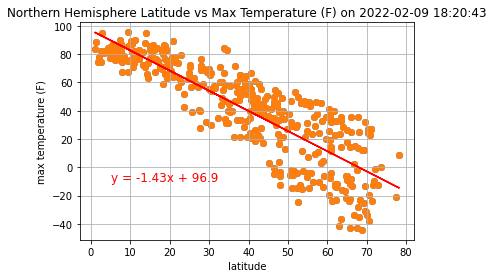

In [36]:
# lat vs temp basic plot
x_lat_north = northern_df['lat']
y_maxtemp_north = northern_df['max temp']
plt.scatter(x_lat_north, y_maxtemp_north)

# titles, labels, and design elements
plt.title(f'Northern Hemisphere Latitude vs Max Temperature (F) on {run_date}')
plt.xlabel('latitude')
plt.ylabel('max temperature (F)')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_maxtemp_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_maxtemp_north)
plt.plot(x_lat_north,regress_values,"r-")

plt.annotate(line_eq,(5, -10),fontsize=12,color="red")

print(f"The correlation between latitude and max temperature(F) in the Northern Hemisphere is {rvalue}")
print("")

# display plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between latitude and max temperature(F) in the Southern Hemisphere is 0.4472681929273678



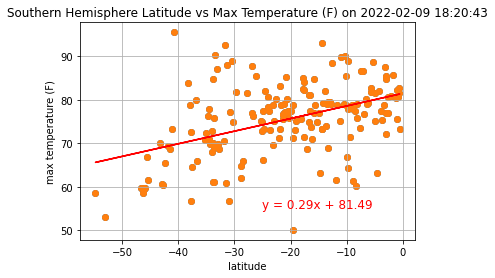

In [37]:
# lat vs temp basic plot
x_lat_south = southern_df['lat']
y_maxtemp_south = southern_df['max temp']
plt.scatter(x_lat_south, y_maxtemp_south)

# titles, labels, and design elements
plt.title(f'Southern Hemisphere Latitude vs Max Temperature (F) on {run_date}')
plt.xlabel('latitude')
plt.ylabel('max temperature (F)')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_maxtemp_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_maxtemp_south)
plt.plot(x_lat_south,regress_values,"r-")

plt.annotate(line_eq,(-25, 55),fontsize=12,color="red")

print(f"The correlation between latitude and max temperature(F) in the Southern Hemisphere is {rvalue}")
print("")

# display plot
plt.show()

## North and South Latitude vs. Max Temperature Plot commentary
In these two plots we see a strong correlation between latitude and temperature. The closer to the equator the warmer the temperatures. 
The correlation is particularly strong in the northern hemisphere right now because we are in our winter. So the colder numbers in the higher latitudes are creating a stronger slope.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between latitude and humidity in the Northern Hemisphere is 0.4435807410612343



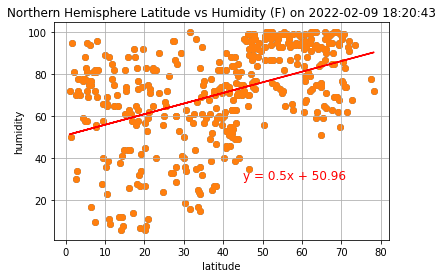

In [38]:
# lat vs temp basic plot
x_lat_north = northern_df['lat']
y_humidity_north = northern_df['humidity']
plt.scatter(x_lat_north, y_humidity_north)

# titles, labels, and design elements
plt.title(f'Northern Hemisphere Latitude vs Humidity (F) on {run_date}')
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_humidity_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_humidity_north)
plt.plot(x_lat_north,regress_values,"r-")

plt.annotate(line_eq,(45, 30),fontsize=12,color="red")

print(f"The correlation between latitude and humidity in the Northern Hemisphere is {rvalue}")
print("")

# display plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between latitude and max temperature(F) in the Southern Hemisphere is 0.24453068439538356



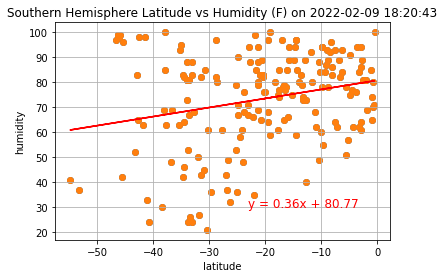

In [39]:
# lat vs temp basic plot
x_lat_south = southern_df['lat']
y_humidity_south = southern_df['humidity']
plt.scatter(x_lat_south, y_humidity_south)

# titles, labels, and design elements
plt.title(f'Southern Hemisphere Latitude vs Humidity (F) on {run_date}')
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_humidity_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_humidity_south)
plt.plot(x_lat_south,regress_values,"r-")

plt.annotate(line_eq,(-23, 30),fontsize=12,color="red")

print(f"The correlation between latitude and max temperature(F) in the Southern Hemisphere is {rvalue}")
print("")

# display plot
plt.show()

## North and South Latitude vs. Humidity Plot commentary
In these two plots we see no particular correlation between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between latitude and cloudiness in the Northern Hemisphere is 0.2630579517638954



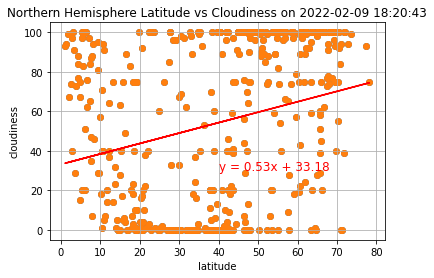

In [40]:
# lat vs temp basic plot
x_lat_north = northern_df['lat']
y_cloudiness_north = northern_df['cloudiness']
plt.scatter(x_lat_north, y_cloudiness_north)

# titles, labels, and design elements
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {run_date}')
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_cloudiness_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_cloudiness_north)
plt.plot(x_lat_north,regress_values,"r-")

plt.annotate(line_eq,(40, 30),fontsize=12,color="red")

print(f"The correlation between latitude and cloudiness in the Northern Hemisphere is {rvalue}")
print("")

# display plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between latitude and cloudiness in the Southern Hemisphere is 0.34263110361487226



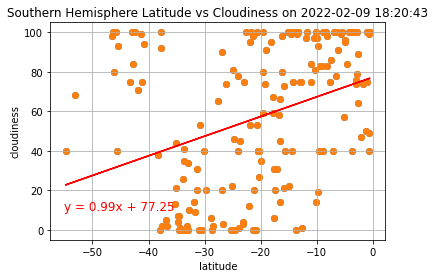

In [41]:
# lat vs temp basic plot
x_lat_south = southern_df['lat']
y_cloudiness_south = southern_df['cloudiness']
plt.scatter(x_lat_south, y_cloudiness_south)

# titles, labels, and design elements
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {run_date}')
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_cloudiness_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_cloudiness_south)
plt.plot(x_lat_south,regress_values,"r-")

plt.annotate(line_eq,(-55, 10),fontsize=12,color="red")

print(f"The correlation between latitude and cloudiness in the Southern Hemisphere is {rvalue}")
print("")

# display plot
plt.show()

## North and South Latitude vs. Cloudiness Plot commentary
In these two plots we see no correlation between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and wind speed in the Northern Hemisphere is 0.1689419174389638



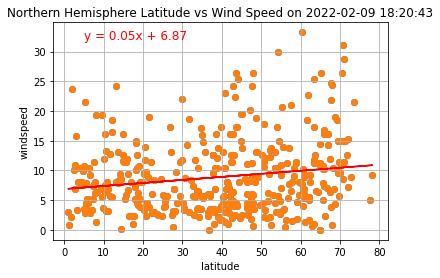

In [42]:
# lat vs temp basic plot
x_lat_north = northern_df['lat']
y_windspeed_north = northern_df['wind speed']
plt.scatter(x_lat_north, y_windspeed_north)

# titles, labels, and design elements
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {run_date}')
plt.xlabel('latitude')
plt.ylabel('windspeed')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_windspeed_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_windspeed_north)
plt.plot(x_lat_north,regress_values,"r-")

plt.annotate(line_eq,(5, 32),fontsize=12,color="red")

print(f"The correlation between latitude and wind speed in the Northern Hemisphere is {rvalue}")
print("")

# display plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and wind speed in the Southrn Hemisphere is -0.1439140052130746



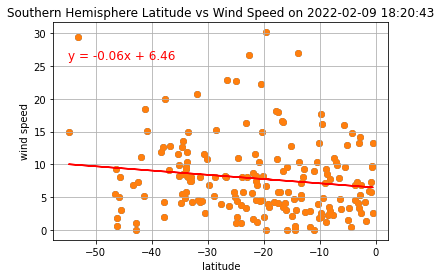

In [43]:
# lat vs temp basic plot
x_lat_south = southern_df['lat']
y_windspeed_south = southern_df['wind speed']
plt.scatter(x_lat_south, y_windspeed_south)

# titles, labels, and design elements
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {run_date}')
plt.xlabel('latitude')
plt.ylabel('wind speed')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_windspeed_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_windspeed_south)
plt.plot(x_lat_south,regress_values,"r-")

plt.annotate(line_eq,(-55, 26),fontsize=12,color="red")

print(f"The correlation between latitude and wind speed in the Southrn Hemisphere is {rvalue}")
print("")

# display plot
plt.show()

## North and South Latitude vs. Humidity Plot commentary
In these two plots we see no correlation between latitude and humidity.